**<h1>Impact of AI on Digital Media (2020-2025)</h1>**

<h2>Name: Suman Prasad Neupane</h2>
<h2>University ID: 24048785</h2>
<h2>College ID: NP01MS7A240052</h2>

In [126]:
%pip install pandas matplotlib seaborn wordcloud squarify imblearn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import squarify

Python(27744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [127]:
# Load data
data = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")

In [128]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null

In [129]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head()

Shape Of The Dataset : (200, 12)

Glimpse Of The Dataset :


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [130]:
data.tail()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
195,Germany,2021,Automotive,89.44,52.98,48.47,12.14,30.60,DALL-E,Lenient,77.21,44.35
196,Germany,2020,Media,70.11,28.26,27.62,57.86,58.71,DALL-E,Strict,78.74,31.73
197,France,2023,Marketing,65.77,49.83,39.94,79.44,43.73,Synthesia,Lenient,81.58,14.62
198,Australia,2023,Automotive,45.35,20.49,33.21,50.50,41.73,Claude,Strict,47.42,43.11
199,South Korea,2020,Healthcare,10.53,20.97,23.64,34.27,45.67,Stable Diffusion,Moderate,58.52,33.37


In [131]:
data.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000


In [132]:
print(data.isnull().sum())

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64


# **<h3>EDA - What We Can Do with This Dataset<h3>**

# 1. Industry-wise AI Adoption Rate

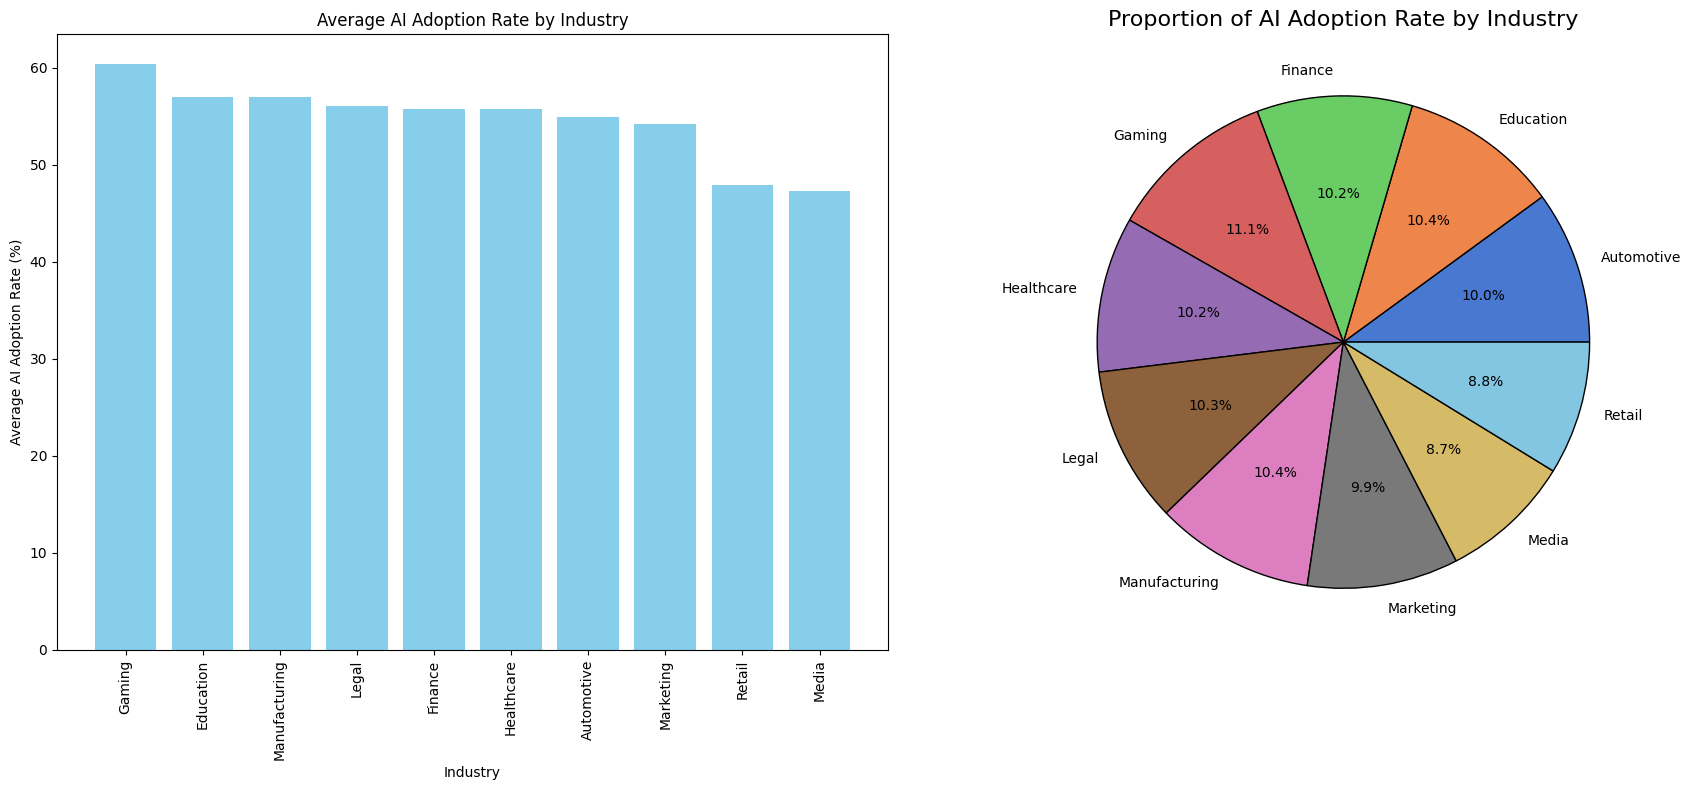

In [140]:
# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Industry', 'AI Adoption Rate (%)'], inplace=True)

# 1. Bar Plot: Average AI Adoption Rate per Industry
avg_adoption_rate = data.groupby('Industry')['AI Adoption Rate (%)'].mean().sort_values(ascending=False)

# 2. Pie Chart: Proportion of AI Adoption Rate by Industry (Average Adoption Rate)
industry_avg = data.groupby('Industry')['AI Adoption Rate (%)'].mean()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar Plot
axes[0].bar(avg_adoption_rate.index, avg_adoption_rate.values, color='skyblue')
axes[0].set_title('Average AI Adoption Rate by Industry')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Average AI Adoption Rate (%)')
axes[0].tick_params(axis='x', rotation=90)

# Pie Chart
industry_avg.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('muted', len(industry_avg)),
                wedgeprops={'edgecolor': 'black'}, ax=axes[1])
axes[1].set_title('Proportion of AI Adoption Rate by Industry', fontsize=16)
axes[1].set_ylabel('')  # Hide the y-label for a cleaner look

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# 2. Country-wise AI Impact on Job Loss and Job Gain

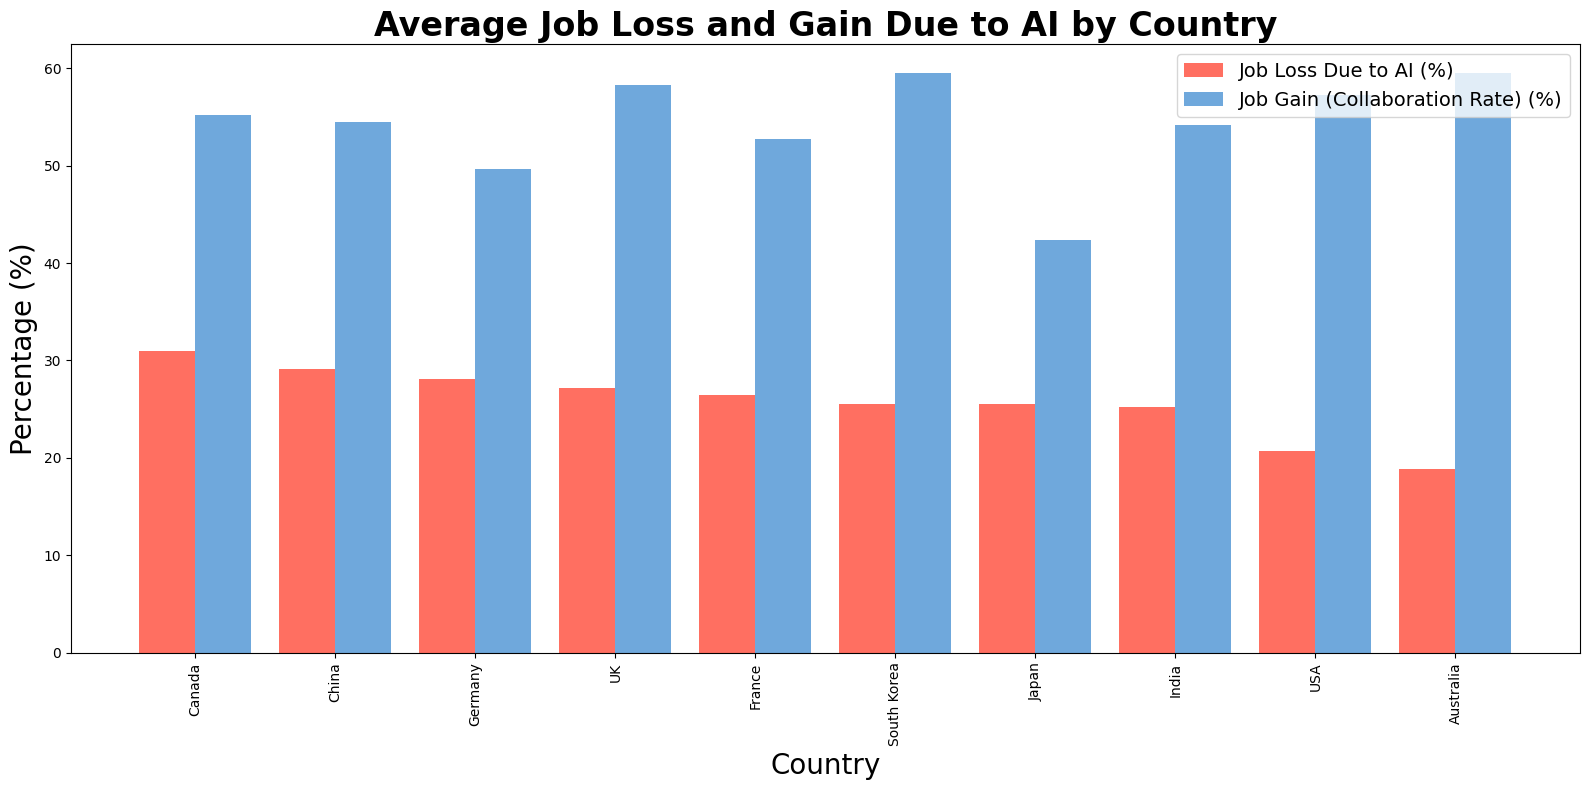

In [134]:
# Load data
data = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")

# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Country', 'Job Loss Due to AI (%)', 'Human-AI Collaboration Rate (%)'], inplace=True)

# Calculate average Job Loss and Job Gain (estimated as 100 - Job Loss)
job_loss_gain_by_country = data.groupby('Country').agg({
    'Job Loss Due to AI (%)': 'mean',
    'Human-AI Collaboration Rate (%)': 'mean'
}).sort_values(by='Job Loss Due to AI (%)', ascending=False)

# Create a single plot for both Job Loss and Job Gain
fig, ax = plt.subplots(figsize=(16, 8))

# Plot both Job Loss and Job Gain
width = 0.4
bar1 = ax.bar(
    job_loss_gain_by_country.index,
    job_loss_gain_by_country['Job Loss Due to AI (%)'],
    width=-width,
    align='edge',
    color='#FF6F61',  # Warm color for Job Loss
    label='Job Loss Due to AI (%)'
)
bar2 = ax.bar(
    job_loss_gain_by_country.index,
    job_loss_gain_by_country['Human-AI Collaboration Rate (%)'],
    width=width,
    align='edge',
    color='#6FA8DC',  # Cool color for Job Gain
    label='Job Gain (Collaboration Rate) (%)'
)

# Add labels and title
ax.set_title('Average Job Loss and Gain Due to AI by Country', fontsize=24, weight='bold')
ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Percentage (%)', fontsize=20)
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='upper right', fontsize=14)  # Smaller font for legend

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# 4. Consumer Trust in AI by Regulation Status

/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_72396/2602491937.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_72396/2602491937.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




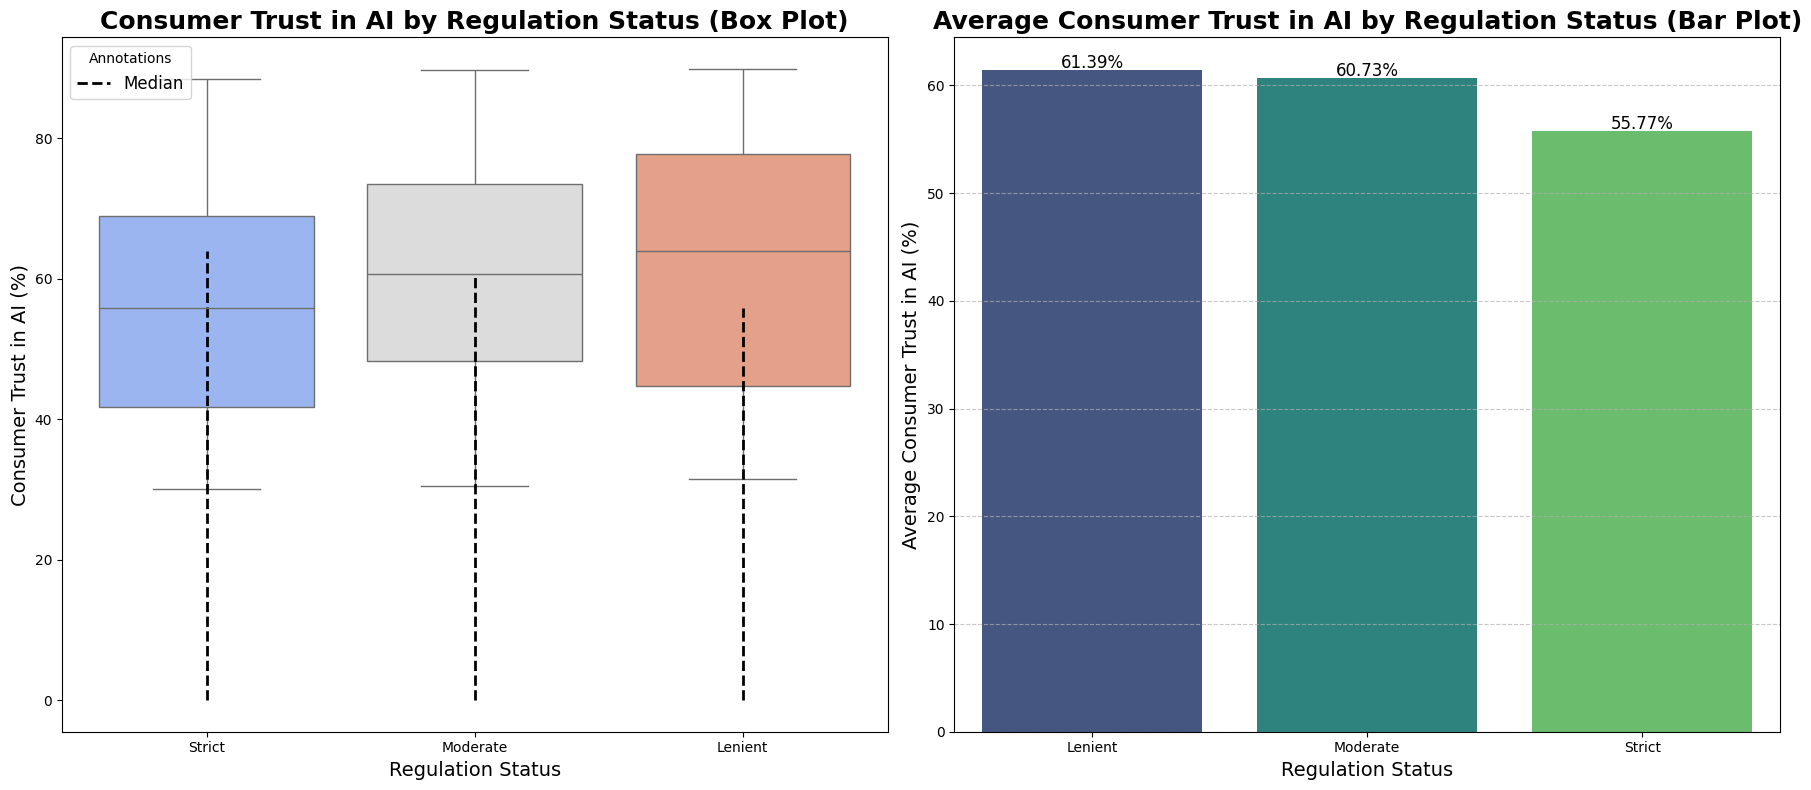

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing (Ensure no missing values in key columns)
data.dropna(subset=['Regulation Status', 'Consumer Trust in AI (%)'], inplace=True)

# Grouping by 'Regulation Status' and calculating the average 'Consumer Trust in AI (%)'
trust_by_regulation = data.groupby('Regulation Status')['Consumer Trust in AI (%)'].mean().sort_values(ascending=False)

# Create a figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Box Plot (Visualizing distribution of trust by regulation status)
sns.boxplot(data=data, x='Regulation Status', y='Consumer Trust in AI (%)', palette='coolwarm', ax=axes[0])
axes[0].set_title('Consumer Trust in AI by Regulation Status (Box Plot)', fontsize=18, weight='bold')
axes[0].set_xlabel('Regulation Status', fontsize=14)
axes[0].set_ylabel('Consumer Trust in AI (%)', fontsize=14)

# Add vertical line for median
median_vals = data.groupby('Regulation Status')['Consumer Trust in AI (%)'].median()
for x, median in enumerate(median_vals):
    axes[0].plot([x, x], [0, median], color='black', linestyle='--', lw=2, label='Median' if x == 0 else "")

# Annotating outliers if needed
outliers = data[data['Consumer Trust in AI (%)'] > 100]  # Assuming trust can't be greater than 100%
for idx, row in outliers.iterrows():
    axes[0].annotate('Outlier', (row['Regulation Status'], row['Consumer Trust in AI (%)']),
                    textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='red')

axes[0].legend(title='Annotations', loc='upper left', fontsize=12)

# 2. Bar Plot (Average trust by regulation status)
sns.barplot(x=trust_by_regulation.index, y=trust_by_regulation.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Consumer Trust in AI by Regulation Status (Bar Plot)', fontsize=18, weight='bold')
axes[1].set_xlabel('Regulation Status', fontsize=14)
axes[1].set_ylabel('Average Consumer Trust in AI (%)', fontsize=14)

# Add annotations (average trust value) above bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add gridlines for better readability
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# 5. Top AI Tools Analysis

/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_72396/3258755682.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




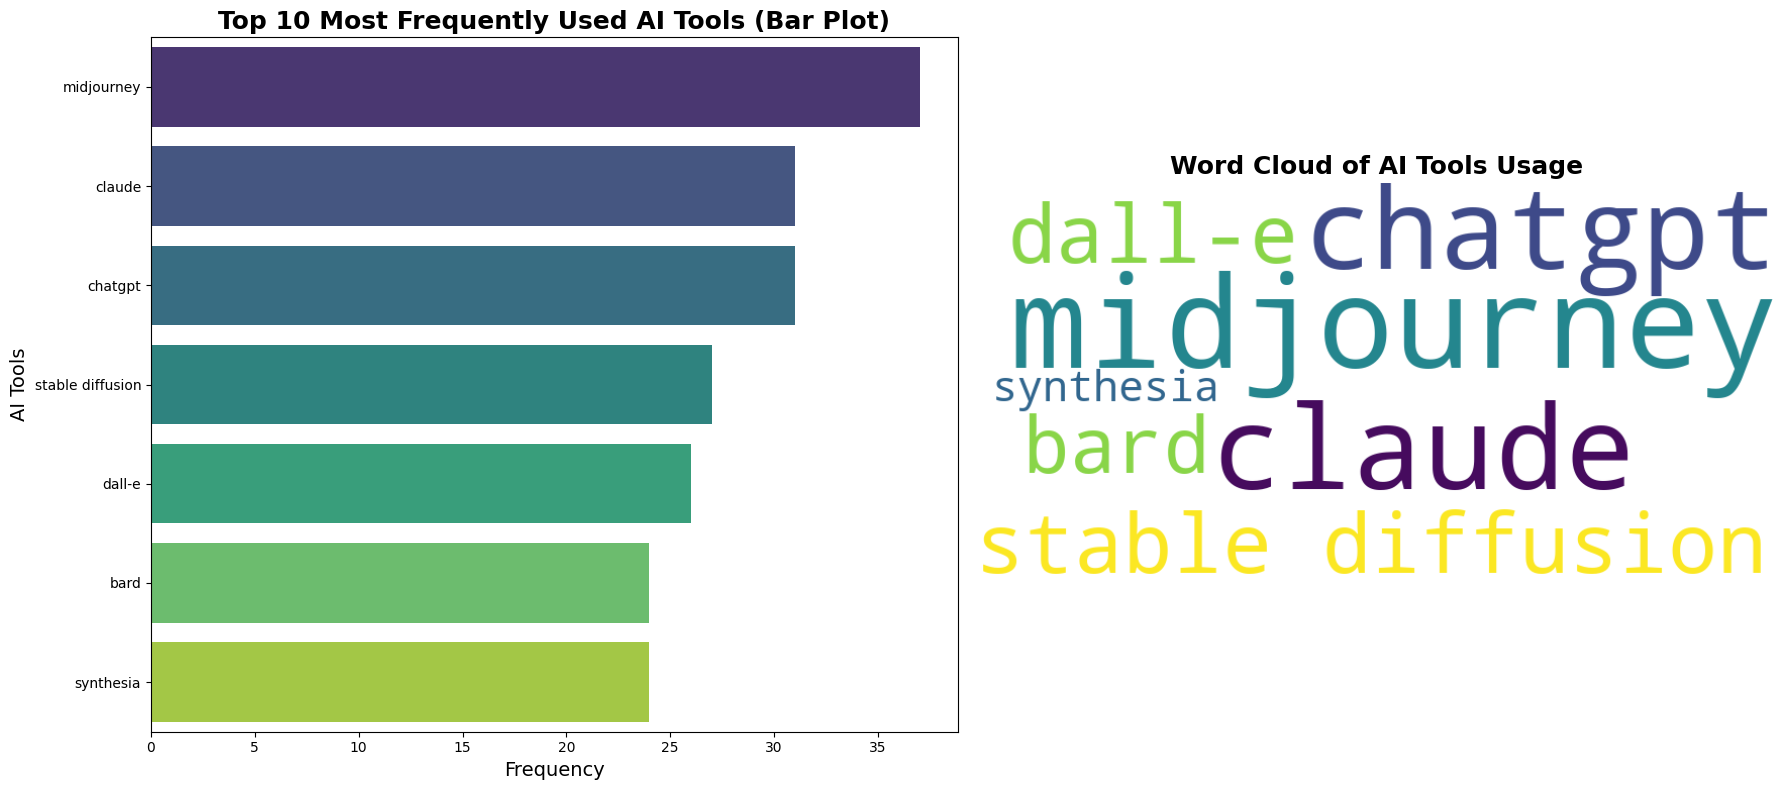

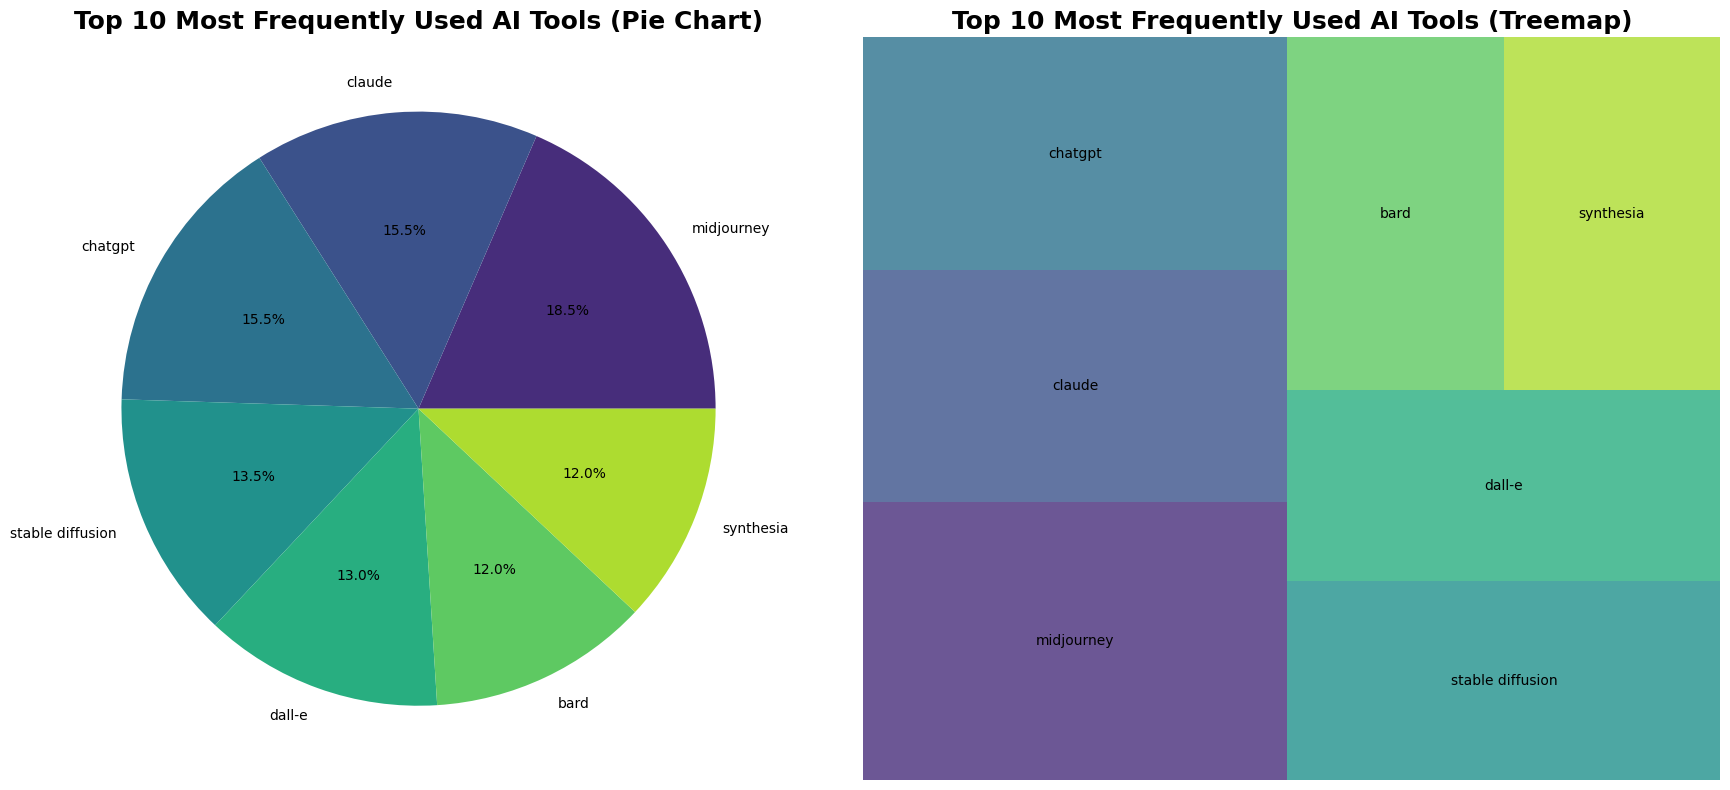

In [136]:
# Assuming 'data' is your DataFrame with the column 'Top AI Tools Used'
# Pre-processing (Ensure no missing values in the 'Top AI Tools Used' column)
data.dropna(subset=['Top AI Tools Used'], inplace=True)

# Clean and tokenize the 'Top AI Tools Used' column
tools_list = data['Top AI Tools Used'].str.split(',').apply(lambda x: [tool.strip().lower() for tool in x])
all_tools = [tool for sublist in tools_list for tool in sublist]  # Flatten the list

# Frequency count of each tool
tool_count = Counter(all_tools)

# Convert the counter object to a DataFrame for easier plotting
tool_df = pd.DataFrame(tool_count.items(), columns=['Tool', 'Frequency'])
tool_df = tool_df.sort_values(by='Frequency', ascending=False)

# Group 1: Bar Plot & Word Cloud
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Bar Plot
sns.barplot(x='Frequency', y='Tool', data=tool_df.head(10), palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Most Frequently Used AI Tools (Bar Plot)', fontsize=18, weight='bold')
axes[0].set_xlabel('Frequency', fontsize=14)
axes[0].set_ylabel('AI Tools', fontsize=14)

# 2. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tool_count)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of AI Tools Usage', fontsize=18, weight='bold')

plt.tight_layout()
plt.show()

# Group 2: Pie Chart & Treemap
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Pie Chart
tool_df.head(10).plot.pie(y='Frequency', labels=tool_df.head(10)['Tool'], autopct='%1.1f%%', legend=False, colors=sns.color_palette('viridis', len(tool_df.head(10))), ax=axes[0])
axes[0].set_title('Top 10 Most Frequently Used AI Tools (Pie Chart)', fontsize=18, weight='bold')
axes[0].set_ylabel('')

# 2. Treemap
squarify.plot(sizes=tool_df['Frequency'].head(10), label=tool_df['Tool'].head(10), color=sns.color_palette('viridis', len(tool_df.head(10))), alpha=0.8, ax=axes[1])
axes[1].set_title('Top 10 Most Frequently Used AI Tools (Treemap)', fontsize=18, weight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# 6. Visualizing AI Content by Country (TBs per year)

In [137]:
import pandas as pd
import plotly.express as px

# Example dataframe (replace with your own data)
data = {
    'Country': ['United States', 'China', 'India', 'Germany', 'Brazil'],
    'AI-Generated Content Volume (TBs per year)': [1000, 800, 600, 400, 300]
}
df = pd.DataFrame(data)

# Group by country and sum content volumes
ai_generated_country = df.groupby('Country')['AI-Generated Content Volume (TBs per year)'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(
    ai_generated_country,  # Data grouped by country
    locations='Country',  # Use the 'Country' column to match countries on the map
    locationmode='country names',  # The location mode is set to country names for easy matching
    color='AI-Generated Content Volume (TBs per year)',  # The color represents the content volume
    color_continuous_scale='Viridis',  # Color scale for visual representation
    title='Total AI-Generated Content Volume by Country',  # Title of the map
    projection="natural earth"  # Use a natural earth projection for a world map view
)

# Show the plot
fig.show()

# 7. Correlation Heatmap

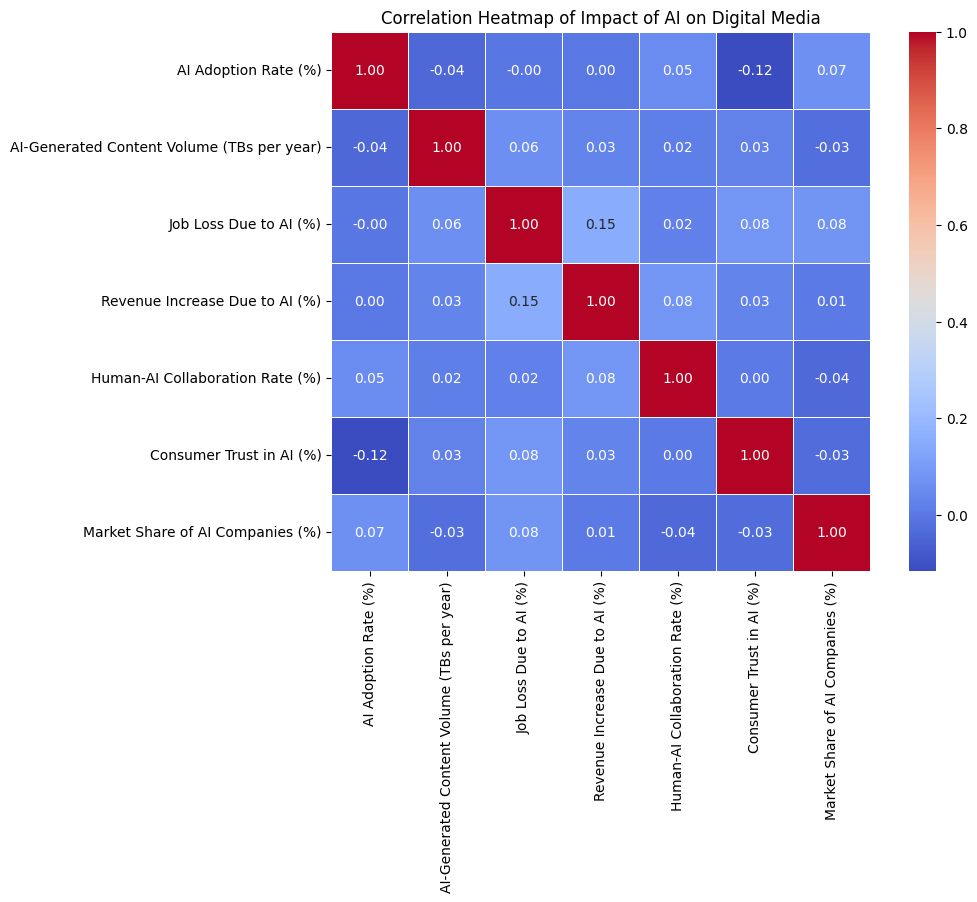

In [138]:
# Load data
data = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")

# Select only numeric columns for correlation
numeric_cols = [
    'AI Adoption Rate (%)',
    'AI-Generated Content Volume (TBs per year)',
    'Job Loss Due to AI (%)',
    'Revenue Increase Due to AI (%)',
    'Human-AI Collaboration Rate (%)',
    'Consumer Trust in AI (%)',
    'Market Share of AI Companies (%)'
]

# Compute the correlation matrix
corr = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    xticklabels= numeric_cols, 
    yticklabels= numeric_cols,
    square=True
)
plt.title('Correlation Heatmap of Impact of AI on Digital Media')
plt.show()
